In [2]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [4]:
train = pd.read_csv('datasets/cv-corpus-9.0-2022-04-27/sw/train.tsv', sep='\t')
dev = pd.read_csv('datasets/cv-corpus-9.0-2022-04-27/sw/dev.tsv', sep='\t')
test = pd.read_csv('datasets/cv-corpus-9.0-2022-04-27/sw/test.tsv', sep='\t')
validated = pd.read_csv('datasets/cv-corpus-9.0-2022-04-27/sw/validated.tsv', sep='\t')
invalidated = pd.read_csv('datasets/cv-corpus-9.0-2022-04-27/sw/invalidated.tsv', sep='\t')
other = pd.read_csv('datasets/cv-corpus-9.0-2022-04-27/sw/other.tsv', sep='\t')

/home/ks/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
print('train', len(train))
print('dev', len(dev))
print('test', len(test))
print('validated', len(validated))
print('invalidated', len(invalidated))
print('other', len(other))

train 19861
dev 9008
test 8934
validated 120101
invalidated 10070
other 353864


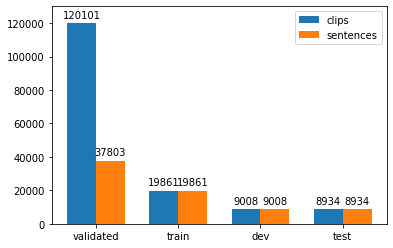

In [9]:
labels = ['validated', 'train', 'dev', 'test']
# data = {'validated': len(validated),'train': len(train), 'dev': len(dev), 'test': len(test)}
clips = [len(validated), len(train), len(dev), len(test)]
sentences = [len(set(validated['sentence'])), len(set(train['sentence'])), len(set(dev['sentence'])), len(set(test['sentence']))]
# names = list(data.keys())
# values = list(data.values())

x = np.arange(len(labels))
width = 0.35

fig,axs = plt.subplots()

rect1 = axs.bar(x - width/2, clips, width, label='clips')
rect2 = axs.bar(x + width/2, sentences, width, label='sentences')
axs.bar_label(rect1, padding=3)
axs.bar_label(rect2, padding=3)
axs.set_xticks(x,labels)
axs.legend()
plt.ylim([0,130000])
# fig.suptitle('Categorical Plotting')
fig.savefig('Training Data Metrics 9_4')

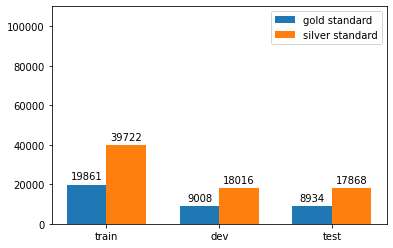

In [10]:
labels = ['train', 'dev', 'test']
# data = {'validated': len(validated),'train': len(train), 'dev': len(dev), 'test': len(test)}
clips = [ len(train), len(dev), len(test)]
# sentences = [len(set(validated['sentence'])), len(set(train['sentence'])), len(set(dev['sentence'])), len(set(test['sentence']))]
sentences = [len(set(train['sentence']))*2, len(set(dev['sentence']))*2, len(set(test['sentence']))*2]
# names = list(data.keys())
# values = list(data.values())

x = np.arange(len(labels))
width = 0.35

fig,axs = plt.subplots()

rect1 = axs.bar(x - width/2, clips, width, label='gold standard')
rect2 = axs.bar(x + width/2, sentences, width, label='silver standard')
axs.bar_label(rect1, padding=3)
axs.bar_label(rect2, padding=3)
axs.set_xticks(x,labels)
axs.legend()
plt.ylim([0,110000])
# fig.suptitle('Categorical Plotting')
fig.savefig('silver standard 9')

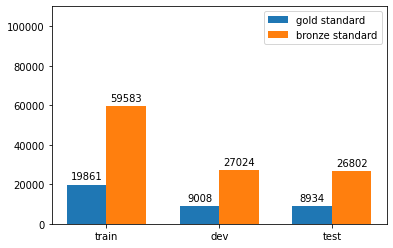

In [11]:
labels = ['train', 'dev', 'test']
# data = {'validated': len(validated),'train': len(train), 'dev': len(dev), 'test': len(test)}
clips = [ len(train), len(dev), len(test)]
# sentences = [len(set(validated['sentence'])), len(set(train['sentence'])), len(set(dev['sentence'])), len(set(test['sentence']))]
# sentences = [len(set(train['sentence']))*2, len(set(dev['sentence']))*2, len(set(test['sentence']))*2]
sentences = [len(set(train['sentence']))*3, len(set(dev['sentence']))*3, len(set(test['sentence']))*3]
# names = list(data.keys())
# values = list(data.values())

x = np.arange(len(labels))
width = 0.35

fig,axs = plt.subplots()

rect1 = axs.bar(x - width/2, clips, width, label='gold standard')
rect2 = axs.bar(x + width/2, sentences, width, label='bronze standard')
axs.bar_label(rect1, padding=3)
axs.bar_label(rect2, padding=3)
axs.set_xticks(x,labels)
axs.legend()
plt.ylim([0,110000])
# fig.suptitle('Categorical Plotting')
fig.savefig('bronze standard 9')

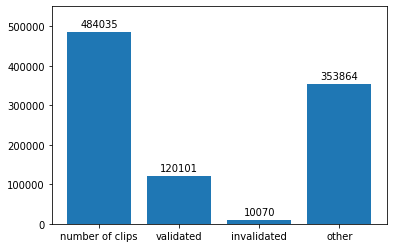

In [14]:
data = {'number of clips': len(validated['sentence'].append(invalidated['sentence']).append(other['sentence'])),'validated': len(validated), 'invalidated': len(invalidated), 'other': len(other)}
names = list(data.keys())
values = list(data.values())

fig,axs = plt.subplots()
rect = axs.bar(names, values)
axs.bar_label(rect, padding=3)
plt.ylim([0,550000])
# fig.suptitle('Categorical Plotting')
fig.savefig('Validation Metrics 9')

Number of Sentences

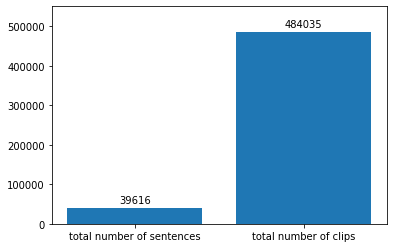

In [24]:
data = {'total number of sentences': len(set(validated['sentence'].append(invalidated['sentence']).append(other['sentence'])))
        ,
       'total number of clips': len(validated['sentence'].append(invalidated['sentence']).append(other['sentence'])
                                   )
       }
names = list(data.keys())
values = list(data.values())

fig,axs = plt.subplots()
rect = axs.bar(names, values)
axs.bar_label(rect, padding=3)
# fig.suptitle('Categorical Plotting')
# str(list(data.values())[0])
plt.ylim([0,550000])
fig.savefig('Total Cplis 9')

In [21]:
print('train', len(set(train['sentence'])))
print('dev', len(set(dev['sentence'])))
print('test', len(set(test['sentence'])))
print('validated', len(set(validated['sentence'])))
print('invalidated', len(set(invalidated['sentence'])))
print('other', len(set(other['sentence'])))

train 19606
dev 8805
test 8941
validated 37352
invalidated 7190
other 39086


In [47]:
print('Total number of sentences')
print(len(set(validated['sentence'].append(invalidated['sentence']).append(other['sentence']))))
print(' ')
print('Total number of sentences included in the validated audios')
print(len(train['sentence'].append(dev['sentence']).append(test['sentence'])))
print(len(set(validated['sentence'])))
print(' ')
print('Total number of audios')
print(len(validated['sentence'].append(invalidated['sentence']).append(other['sentence'])))
print(' ')
print('Total number of validated audios, ie. those used in the train/dev/test split')
print(len(validated))
print(' ')
print('Total number of invalidated audios, these are excluded from the train/dev/test split')
print(len(invalidated))
print(' ')
print('Total number of yet to be validated audios, these are excluded from the train/dev/test split')
print(len(other))

Total number of sentences
39118
 
Total number of sentences included in the validated audios
37352
37352
 
Total number of audios
445191
 
Total number of validated audios, ie. those used in the train/dev/test split
99733
 
Total number of invalidated audios, these are excluded from the train/dev/test split
7756
 
Total number of yet to be validated audios, these are excluded from the train/dev/test split
337702


Number of audios per sentence

In [51]:
validated['sentence']

0                       Inajulikana kama shina la Warangi.
1                       Hasa aliandika riwaya na mashairi.
2        Wachaga hutania kwa kusema kuwa wapare wanakul...
3                 Alipenda kuimba na daima alitaka kuimba.
4        Watalii wanapenda sehemu hii kwa sababu hakuna...
                               ...                        
99728                                    Aliitwa mara tatu
99729                                 Hana pesa za kutosha
99730                         Chakula chako si kitamu vile
99731                          Maradhi ya tumbo sio mchezo
99732          Nchi yetu haina mwelekeo dhabiti wa kisiasa
Name: sentence, Length: 99733, dtype: object

In [56]:
Counter(list(validated['sentence'])).most_common()

[('Zote ziko ndani ya jimbo la Malindi.', 15),
 ('Alikuwa mwanamke wa kwanza kuchaguliwa na kuongoza nchi ya Kiislamu.', 15),
 ('Shule ya sekondari alimaliza vema katika masomo ya sayansi.', 15),
 ('Alifanya hivyo ingawa alipenda zaidi maisha ya ndani ya monasteri.', 14),
 ('Kadiri ya wanahistoria Wakristo.', 14),
 ('Aliwahi kucheza timu ya taifa ya Romania.', 13),
 ('Hall alianza kazi yake ya kamera kama mwigizaji wa kibiashara.', 13),
 ('Anaishi mjini Heppenheim-Sonderbach, Hesse.', 13),
 ('Uso wao ni mweusi.', 13),
 ('Yeye huishi na hufanya mazoezi yake ya mbio Ngong,karibu na jiji la Nairobi.',
  13),
 ("Kufuatana na uainishaji wa lugha kwa ndani zaidi, Kibakati'-Sara iko katika kundi la Kiland-Dayak.",
  13),
 ('Njia za kuingiza dawa mwilini ni pamoja na mdomo, pua, ngozi au sindano.',
  13),
 ('Spishi zote za fuko-dhahabu zinatokea Afrika kusini kwa Sahara.', 12),
 ('Anaheshimiwa na Kanisa Katoliki, Waorthodoksi, Waorthodoksi wa Mashariki, Walutheri na Waanglikana kama mtakatifu 

 Gender dynamics

In [60]:
set(validated['gender'])
set(validated['age'])

{'fifties', 'fourties', nan, 'sixties', 'teens', 'thirties', 'twenties'}

In [69]:
print('train/dev/test set gender dynamics')
print(Counter(list(train['gender'].append(dev['gender']).append(test['gender']))))
print(' ')
print('validated set gender dynamics')
print(Counter(list(validated['gender'])))
print(' ')
print('Entire set gender dynamics ie. validated + unvalidated')
print(Counter(list(validated['gender'].append(invalidated['gender']).append(other['gender']))))

train/dev/test set gender dynamics
Counter({nan: 15427, 'male': 11025, 'female': 10900})
 
validated set gender dynamics
Counter({'male': 43865, nan: 34921, 'female': 20947})
 
Entire set gender dynamics ie. validated + unvalidated
Counter({'male': 182190, 'female': 151413, nan: 111588})


Age dynamics

In [70]:
print('train/dev/test set age dynamics')
print(Counter(list(train['age'].append(dev['age']).append(test['age']))))
print(' ')
print('validated set age dynamics')
print(Counter(list(validated['age'])))
print(' ')
print('Entire set age dynamics ie. validated + invalidated + other')
print(Counter(list(validated['age'].append(invalidated['age']).append(other['age']))))

train/dev/test set age dynamics
Counter({'twenties': 18343, nan: 15704, 'thirties': 1748, 'fourties': 765, 'fifties': 756, 'sixties': 35, 'teens': 1})
 
validated set age dynamics
Counter({'twenties': 45864, nan: 35400, 'thirties': 15253, 'fourties': 1680, 'fifties': 1464, 'sixties': 71, 'teens': 1})
 
Entire set age dynamics ie. validated + invalidated + other
Counter({'twenties': 199794, nan: 126716, 'thirties': 65442, 'fifties': 28169, 'fourties': 21782, 'sixties': 3152, 'teens': 136})


In [77]:
DataFrame(set(validated['sentence'].append(invalidated['sentence']).append(other['sentence'])))
# .to_csv('cv-sw-for-tts.txt', header=None, index=None)

NameError: name 'DataFrame' is not defined

In [62]:
train

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale,segment
0,fa923498f56bd5b96add49ff651d75142835ec60748579...,common_voice_sw_28704519.mp3,Spishi zote zinatokea Afrika tu.,2,0,twenties,female,NaN,sw,NaN
1,fa923498f56bd5b96add49ff651d75142835ec60748579...,common_voice_sw_28704543.mp3,Kiebrania kilikuwa lugha ya Israeli ya Kale wa...,2,0,twenties,female,NaN,sw,NaN
2,fa923498f56bd5b96add49ff651d75142835ec60748579...,common_voice_sw_28704555.mp3,Wakati mwingine inaweza kutokea bila kuleta ma...,2,0,twenties,female,NaN,sw,NaN
3,fa923498f56bd5b96add49ff651d75142835ec60748579...,common_voice_sw_28704557.mp3,Gregori wa Tours aliandika juu yake.,2,0,twenties,female,NaN,sw,NaN
4,fa923498f56bd5b96add49ff651d75142835ec60748579...,common_voice_sw_28704588.mp3,Aliwahi kucheza timu ya taifa ya Uswisi.,2,0,twenties,female,NaN,sw,NaN
...,...,...,...,...,...,...,...,...,...,...
19601,457b3a2570720101c75d297cde767487e8f0a1a7f714cb...,common_voice_sw_30062381.mp3,Pamoja masalia ya viwanda vya chuma katika ene...,2,1,thirties,male,NaN,sw,NaN
19602,457b3a2570720101c75d297cde767487e8f0a1a7f714cb...,common_voice_sw_30063221.mp3,joto la baharini lina viwango vya juu vya unye...,2,0,thirties,male,NaN,sw,NaN
19603,457b3a2570720101c75d297cde767487e8f0a1a7f714cb...,common_voice_sw_30065486.mp3,Hata hivyo ni lazima wakati huo huo sisi kuzin...,2,0,thirties,male,NaN,sw,NaN
19604,457b3a2570720101c75d297cde767487e8f0a1a7f714cb...,common_voice_sw_30067147.mp3,Yanaweza yakaashiria dalili za maambukizi ya v...,2,0,thirties,male,NaN,sw,NaN


In [18]:
dist = Counter(list(validated['sentence'].append(invalidated['sentence']).append(other['sentence']))).values()

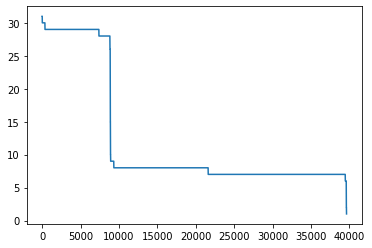

In [19]:
fig, axs = plt.subplots()
axs.plot(sorted(dist, reverse=True))
fig.savefig('repetitions 9')

In [84]:
dist

dict_values([28, 29, 6, 29, 30, 29, 28, 29, 29, 29, 29, 6, 6, 29, 28, 29, 29, 29, 29, 29, 29, 29, 29, 28, 29, 6, 6, 29, 29, 29, 29, 29, 29, 29, 30, 29, 29, 28, 29, 6, 6, 6, 29, 30, 29, 7, 7, 7, 7, 29, 29, 29, 29, 7, 7, 7, 7, 29, 29, 30, 29, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 29, 29, 29, 28, 28, 29, 28, 29, 29, 29, 29, 29, 28, 29, 28, 6, 6, 29, 29, 29, 31, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 28, 29, 28, 28, 29, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 29, 29, 29, 29, 29, 29, 29, 29, 30, 29, 29, 29, 29, 30, 29, 29, 29, 29, 29, 29, 29, 29, 30, 29, 29, 6, 6, 6, 6, 6, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 6, 6, 6, 6, 6, 6, 29, 29, 29, 29, 29, 30, 29, 29, 29, 29, 29, 30, 29, 28, 29, 28, 29, 29, 28, 28, 30, 29, 29, 30, 29, 29, 29, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 30, 29, 28, 29, 29, 28, 29, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 